In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import random

from IPython.display import Image

from scipy.optimize import curve_fit

import matplotlib.ticker as plticker

np.set_printoptions(suppress=True)

### Intro To TimeSeries Analysis

* We will cover a few essential concepts for analyzing or modeling time series
* This is meant to be an introductory overview
  * Time Series are complex and warrant an entire course
* We will only consider univariate time series

### Time Serie Data 

* Time series data is different from data we used so far with regards to two aspects 

1. Data points are not independent of each other
  * Observation a time $t$ is dependent on observation at time $t-1$
  * Therefore, ordering of the data matters
2. Data does not come from the same distribution
  * Data may come from different distributions (typically same class of distributions but different parameters)


### Some of the Goal of Time Series Analysis or Modeling

* Find the model that best describes the data and use that model to identify trends in the data.
  * Forecast future values
  * Identify variability in forecasts 
  
* So far, we were principally interested in understanding the models
  * Understanding the logic of the generative process
  * Uncovering the model's parameters
  * Principally test hypotheses
      * Likelihood of certain data
      * Comparing datasets
      * etc.
      


### What Are Time Series

- Time series are data where the variation of some quantity is followed over time

- Examples: 

  - The number of cars that pass an intersection over time
  - The number of travelers arriving at HNL over time
  - Temperature fluctuations over time
  


### Class of Time Series  Models Covered Here

* We will cover *two basic* types of models.

  * Regression models that use the time component in a model to infer $y$.

  * Models that use past values and past prediction errors to model actual values 
    * Bread and butter of econometrics, finance, atmospheric sciences, etc.
  
* Here, again, we are using a parametric and non-parametric approach to looking at time series data
 

### Types of Time series

* Random walks: predominantly noise (ex. Stock returns) 
  * No discernible patterns.
  * Any observed patterns are due to noise.
  
 
  $V_t= V_{t-1} + \epsilon_t$, where $\epsilon ~\sim \mathcal{N}(\mu, \sigma)$ 


* Full or partial combination  of trend, seasonality, noise noise (ex. CO2 levels in the atmosphere)

  $v_t = f(t) + s(t) + \epsilon_t$, `f` is trend function and `s`  a seasonality function


In [2]:
### Types of Time series: A Random Walk

v = np.zeros(1000)
mu = 0,
sigma = 1

for t in range(1000):
    v[t] = v[t-1] + np.random.normal(0,1)

v[0:10]

array([-1.20767871,  0.40315961,  1.76776109,  2.66759597,  2.85604982,
        3.0283769 ,  3.01689635,  2.07788929,  3.55888483,  4.54002169])

Text(0.5, 1.0, 'Example of a Ramdom Walk')

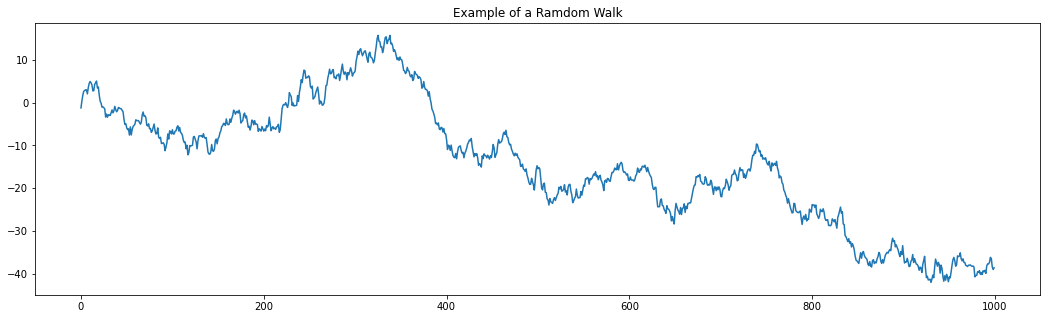

In [3]:
plt.figure(figsize=(18,5))
plt.plot(np.arange(1_000 ), v)

plt.title("Example of a Ramdom Walk")

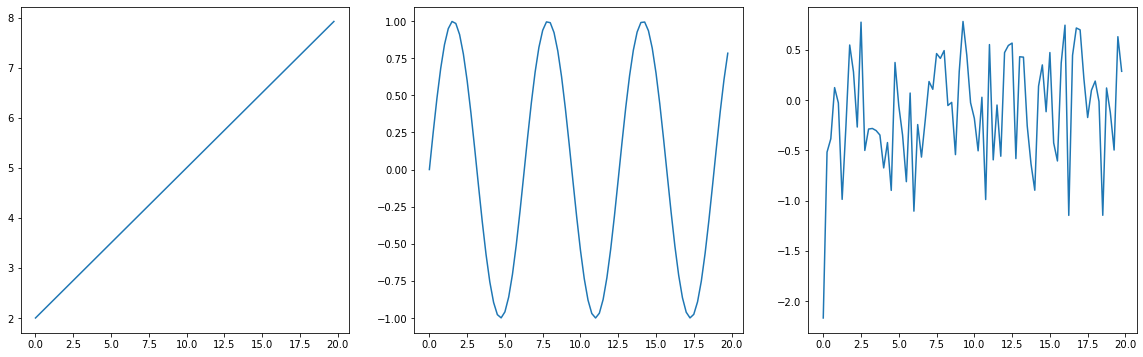

In [4]:
plt.figure(figsize=(20,6))

x_axis = np.arange(0, 20, 0.25)

trend = np.zeros(len(x_axis))
seasonaility = np.zeros(len(x_axis))
noise = np.zeros(len(x_axis))

a = 2 
b = 0.3

for i, _ in enumerate(x_axis):
    trend[i] = a + b * x_axis[i]
    seasonaility[i] = np.sin(x_axis[i])
    noise[i] = np.random.normal(0, 0.5)    

plt.subplot(1,3,1)
plt.plot(x_axis, trend)

plt.subplot(1,3,2)
plt.plot(x_axis, seasonaility)

plt.subplot(1,3,3)
plt.plot(x_axis, noise)


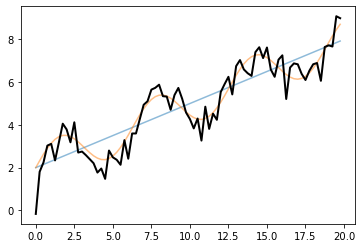

In [5]:
plt.plot(x_axis, trend, alpha=0.5)
plt.plot(x_axis, trend+seasonaility, alpha=0.5)

plt.plot(x_axis, trend + seasonaility + noise, linewidth=2, c='k')

### Time Series Examplee: Mauna Loa Dataset

* Looking at $CO_2$ values in the atmosphere as measured on Mauna Loa on the Big Island.
* The data was recorded monthly between 1959 and 1999.
* We model this dataset to highlight the three different components of time series.

$$ 
TimeSeries  ~~~~~~~~\overline{\underline{\text{ is compsed of}}}    ~~~~~~~~ Trend + Seasonality + Stochastic ~ Fluctuations
$$

In [56]:
import pandas as pd
co2_data = pd.read_csv("https://www.dropbox.com/s/cegyok4vqmhikey/carbon_dioxide.txt?dl=1", names=["co2_val"])
co2_data.co2_val = co2_data.co2_val.astype('float64')
co2_data.head()

,co2_val
0,315.42
1,316.32
2,316.49
3,317.56
4,318.13


### `pandas` and Time Series 

*`pandas` makes it easy to work with time series. 

* Extensive functionality to align multiple time series, subsample, impute missing values, etc

* We will cover some functionality but refer to Wes McKinney's book for thorough coverage
    * Chapter free online (link on the course website)

* Documentation on https://pandas.pydata.org/pandas-docs/stable/timeseries.html    

In [7]:
# generates ranges as timestamps, which are more appropriate for time series data
# Index is of type `pandas Timestamps`

dateIndex = pd.to_datetime(pd.date_range('1/1/1959', periods = len(co2_data), freq= "MS"))
dateIndex

DatetimeIndex(['1959-01-01', '1959-02-01', '1959-03-01', '1959-04-01',
               '1959-05-01', '1959-06-01', '1959-07-01', '1959-08-01',
               '1959-09-01', '1959-10-01',
               ...
               '1990-03-01', '1990-04-01', '1990-05-01', '1990-06-01',
               '1990-07-01', '1990-08-01', '1990-09-01', '1990-10-01',
               '1990-11-01', '1990-12-01'],
              dtype='datetime64[ns]', length=384, freq='MS')

In [8]:
# datetime64
co2_data.index = dateIndex
print(co2_data.index)

DatetimeIndex(['1959-01-01', '1959-02-01', '1959-03-01', '1959-04-01',
               '1959-05-01', '1959-06-01', '1959-07-01', '1959-08-01',
               '1959-09-01', '1959-10-01',
               ...
               '1990-03-01', '1990-04-01', '1990-05-01', '1990-06-01',
               '1990-07-01', '1990-08-01', '1990-09-01', '1990-10-01',
               '1990-11-01', '1990-12-01'],
              dtype='datetime64[ns]', length=384, freq='MS')


In [9]:
co2_data.head()

,co2_val
1959-01-01,315.42
1959-02-01,316.32
1959-03-01,316.49
1959-04-01,317.56
1959-05-01,318.13


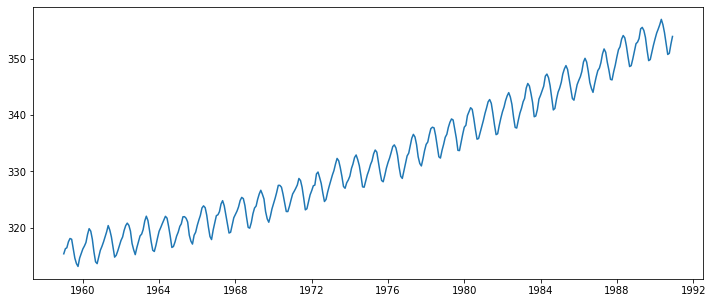

In [10]:
plt.figure(figsize=(12,5))

plt.plot(co2_data['co2_val'])

### Indexing `datetime`

* Values of `DataFrame` with a `datetime64` index can be accessed using a partial string.
  * `year` or `year-month` or `year-month-day` , etc...
     
* This includes using partial strings in ranges
  * The end index is included in the results



In [11]:
co2_data.loc['1960']

,co2_val
1960-01-01,316.27
1960-02-01,316.81
1960-03-01,317.42
1960-04-01,318.87
1960-05-01,319.87
1960-06-01,319.43
1960-07-01,318.01
1960-08-01,315.75
1960-09-01,314.00
1960-10-01,313.68


In [12]:
co2_data.loc['1960-4']

,co2_val
1960-04-01,318.87


In [13]:
co2_data.loc['1960-9':'1961-3']

,co2_val
1960-09-01,314.00
1960-10-01,313.68
1960-11-01,314.84
1960-12-01,316.03
1961-01-01,316.73
1961-02-01,317.54
1961-03-01,318.38


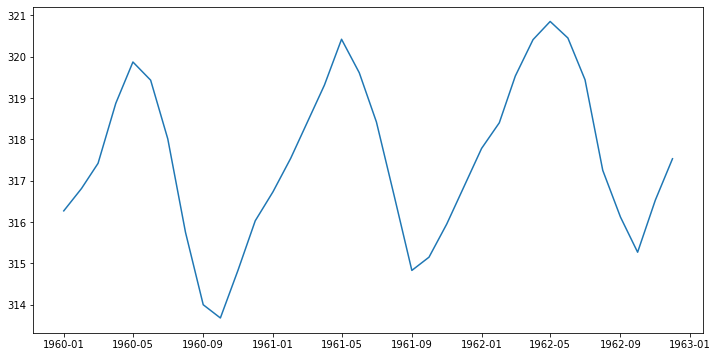

In [14]:
plt.figure(figsize=(12,6))

plt.plot(co2_data.loc['1960':'1962']['co2_val'])

### Accessing the Subsets of the DateTime Object

* Since the index is a `timestamp`, we can easily access subsets of the `timestamp`

  * day, day of the week, month, month_name, etc...

In [15]:
co2_data.index.day


Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
           dtype='int64', length=384)

In [16]:
co2_data.index.dayofweek

Int64Index([3, 6, 6, 2, 4, 0, 2, 5, 1, 3,
            ...
            3, 6, 1, 4, 6, 2, 5, 0, 3, 5],
           dtype='int64', length=384)

In [17]:
# See strftime() and strptime() Format Codes at https://strftime.org/
co2_data.index.strftime('%A')

Index(['Thursday', 'Sunday', 'Sunday', 'Wednesday', 'Friday', 'Monday',
       'Wednesday', 'Saturday', 'Tuesday', 'Thursday',
       ...
       'Thursday', 'Sunday', 'Tuesday', 'Friday', 'Sunday', 'Wednesday',
       'Saturday', 'Monday', 'Thursday', 'Saturday'],
      dtype='object', length=384)

In [18]:
co2_data.index.strftime('%b')

Index(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
       ...
       'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
      dtype='object', length=384)

In [19]:
co2_data[co2_data.index.year.isin([1960, 1970])]

,co2_val
1960-01-01,316.27
1960-02-01,316.81
1960-03-01,317.42
1960-04-01,318.87
1960-05-01,319.87
1960-06-01,319.43
1960-07-01,318.01
1960-08-01,315.75
1960-09-01,314.00
1960-10-01,313.68


In [20]:
sample_4years = co2_data[co2_data.index.year.isin([1960, 1970, 1980, 1990])]
sample_4years.head()


,co2_val
1960-01-01,316.27
1960-02-01,316.81
1960-03-01,317.42
1960-04-01,318.87
1960-05-01,319.87


In [21]:
print(sample_4years.index.year)
print("\n----------\n")
print(len(sample_4years.index.year))


Int64Index([1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960,
            1960, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970,
            1970, 1970, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980,
            1980, 1980, 1980, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990,
            1990, 1990, 1990, 1990],
           dtype='int64')

----------

48


In [22]:
sample_4years.loc['1960']

,co2_val
1960-01-01,316.27
1960-02-01,316.81
1960-03-01,317.42
1960-04-01,318.87
1960-05-01,319.87
1960-06-01,319.43
1960-07-01,318.01
1960-08-01,315.75
1960-09-01,314.00
1960-10-01,313.68


### Modeling the Trend and  Seasonality

1. Exploring the trend and seasonality
2. Forming a hypothesis
3. Writing and testing the model to account for the trend and seasonality
   * Naturally, we cannot model the residual noise

###  1- Exploring the data

* Data exploration is an important aspect of data analysis
    * Critical for time series data
    
*  Some Important Questions
   * Is the data seasonal?
   * What are the lows and highs?
   * Is the seasonality consistent?
      * How much variation is there?
  
* This is, principally, an exploratory activity.
  * Any method that allows us to ascertain presence or absence of a trend is fine

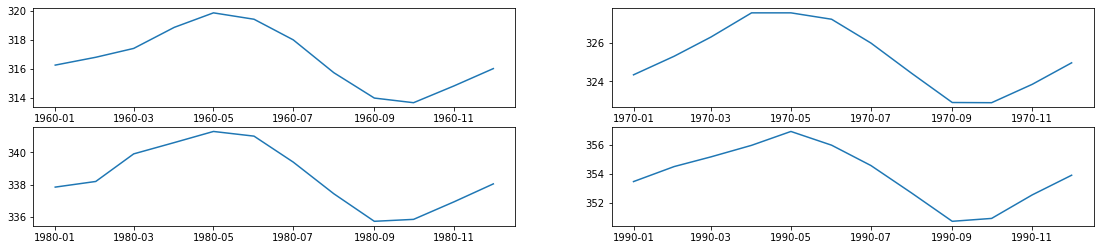

In [23]:
plt.figure(figsize=(19,4))
plt.subplot(2,2,1)
plt.plot(sample_4years.loc['1960']['co2_val'])

plt.subplot(2,2,2)
plt.plot(sample_4years.loc['1970']['co2_val'])

plt.subplot(2,2,3)
plt.plot(sample_4years.loc['1980']['co2_val'])

plt.subplot(2,2,4)
plt.plot(sample_4years.loc['1990']['co2_val']) 

### Using a Boxplot to Explore Seasonality

<img src="https://www.dropbox.com/s/bng728ka6bsyozu/boxplot.png?dl=1" alt="drawing" style="width:300px;"/>


In [24]:
# Examine seasonal trend in the data

co2_data['Month'] = co2_data.index.strftime('%b')

co2_data['Year'] = co2_data.index.year

co2_data.head()

,co2_val,Month,Year
1959-01-01,315.42,Jan,1959
1959-02-01,316.32,Feb,1959
1959-03-01,316.49,Mar,1959
1959-04-01,317.56,Apr,1959
1959-05-01,318.13,May,1959


In [25]:
co2_data_piv = co2_data.pivot(index='Year', columns='Month', values='co2_val')

co2_data_piv.head()

Month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Year,,,,,,,,,,,,
1959,317.56,314.66,315.43,316.32,315.42,316.39,318.00,316.49,318.13,314.66,313.18,313.68
1960,318.87,315.75,316.03,316.81,316.27,318.01,319.43,317.42,319.87,314.84,313.68,314.00
1961,319.31,316.64,316.85,317.54,316.73,318.42,319.61,318.38,320.42,315.95,315.15,314.83
1962,320.41,317.25,317.53,318.40,317.78,319.44,320.45,319.53,320.85,316.53,315.27,316.12
1963,321.22,317.61,318.20,318.92,318.58,319.58,321.31,319.70,322.08,316.91,315.83,316.05


In [26]:
# We reindex the data to have the months in order
orderedMonths = ["Jan", "Feb", "Mar", 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

co2_data_piv = co2_data_piv.reindex(columns=orderedMonths)

co2_data_piv.head()

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1959,315.42,316.32,316.49,317.56,318.13,318.00,316.39,314.66,313.68,313.18,314.66,315.43
1960,316.27,316.81,317.42,318.87,319.87,319.43,318.01,315.75,314.00,313.68,314.84,316.03
1961,316.73,317.54,318.38,319.31,320.42,319.61,318.42,316.64,314.83,315.15,315.95,316.85
1962,317.78,318.40,319.53,320.41,320.85,320.45,319.44,317.25,316.12,315.27,316.53,317.53
1963,318.58,318.92,319.70,321.22,322.08,321.31,319.58,317.61,316.05,315.83,316.91,318.20


<AxesSubplot:xlabel='Month'>

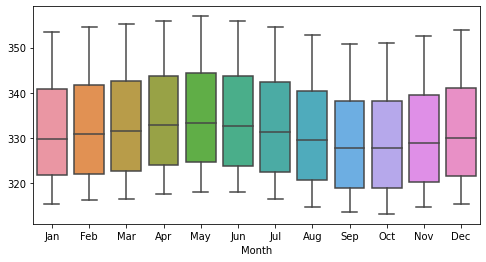

In [27]:
plt.figure(figsize=(8, 4))
sns.boxplot( data=co2_data_piv)

### 2- Forming a Hypothesis

* The seasonality hypothesis is also supported by the boxplot above.

* Here, we only explored four years-worth of data, but both representations indicate the presence of a consistent seasonality signal in the data
  * Confirmed using two methods


<img src="https://www.dropbox.com/s/fvn8y9fx1ijiiba/seasonality.png?dl=1" width="700">

<center><i>The seasonality looks sinusoidal with a period of one year.</i></center>


### 2- Exploring the Trend
 * Here again, the activity is exploratory. 
   * Where do we start?
 * We can use any visualization that can help us identify the trend if one is present.
  * Can you provide an example?

In [28]:
sample_4years = pd.DataFrame({"co2_val": sample_4years["co2_val"], 'year': sample_4years.index.year})
sample_4years.head()

,co2_val,year
1960-01-01,316.27,1960
1960-02-01,316.81,1960
1960-03-01,317.42,1960
1960-04-01,318.87,1960
1960-05-01,319.87,1960


<AxesSubplot:xlabel='year', ylabel='co2_val'>

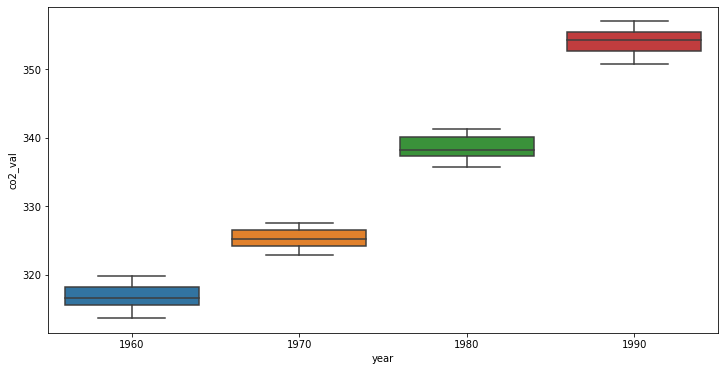

In [29]:
plt.figure(figsize=(12,6))
sns.boxplot(x="year", y="co2_val", data=sample_4years)

### Avereging Data Per Period

* We inspect the overall trend by plotting the average of $CO2$ values averaged per year.

* We need to group the data by year
  - Instead of using `groupby` as we did in the past, we will use `resample`
  - `resample` takes time related params that indicte how we intend to `groupby`
  - `AS` means `ANNUAL, START`


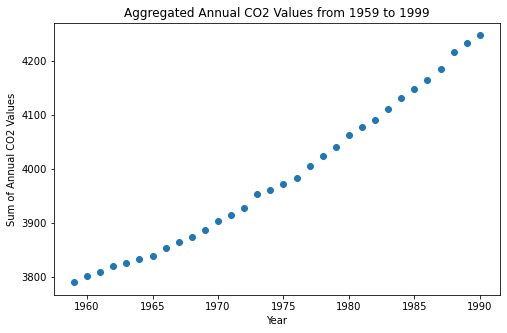

In [30]:
_, ax = plt.subplots(figsize=(8,5));


annual_sums =  co2_data['co2_val'].resample('AS').sum()
annual_sums
plt.scatter(np.array(range(len(annual_sums)))+1959, annual_sums)


ax.set_title('Aggregated Annual CO2 Values from 1959 to 1999');
ax.set_ylabel('Sum of Annual CO2 Values');
ax.set_xlabel('Year');
ax.xaxis.set_ticks_position('bottom')


### 2. Forming a hypothesis

* Both these visualizations show that there is a trend in the data
  * A continuous increase in $CO_2$ concentrations over time
  * Both are good ways to show the trend in the data


### Some Use Time Series  Modeling Tips
It's usually helpful to: 

1. Have the data go through the origin 
  - Makes it easier to tweak a function that represents the data
  - This can be achieved by simply subtracting the offset form the data (shifting the time series)
  
2. Represent th $x-$axis in a numerical form so that we can use it in the model
  * Harder to model date or string labels
  * We can achieve this by replacing the year/month by a sequential number representing the number of months since the first measurement

<img src="https://www.dropbox.com/s/gvaf9aidqr524qm/before_after.png?dl=1" width=500>


(0.0, 400.0)

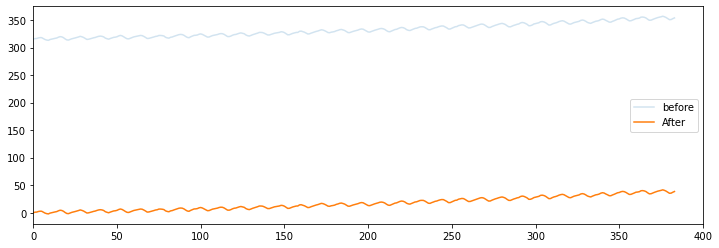

In [31]:
normalized_col =  pd.DataFrame(co2_data['co2_val'] -  co2_data['co2_val'].iloc[0])

normalized_col.index = range(0,len(normalized_col))

plt.figure(figsize=(12,4))

plt.plot(normalized_col.index, co2_data['co2_val'], alpha=0.2, label="before")
plt.plot(normalized_col['co2_val'], label="After")
plt.legend()
plt.xlim(0, 400)

### Using an Appropriate Model for the Trend

Let's start modeling the data by describing the trend in the data:

- How can we describe the trend? 
  - The increase does not appear to be linear.   

- Does it follow a power law?
$$
    f(x) = c_0 + c \cdot x^m 
$$

* Useful to be familiar with some of the most common parent (common) functions
  * Starting point that can be tweaked to provide better fits.
  * Ex.: https://www.onlinemathlearning.com/parent-functions.html

(0.0, 400.0)

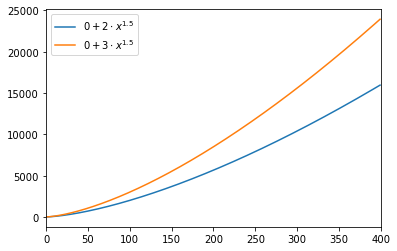

In [32]:
def func_powerlaw(x, m, c, c0):
    return c0 + x**m * c

x = np.arange(0,400,1)

y_1 = func_powerlaw(x, 1.5, 2, 0)
y_2 = func_powerlaw(x, 1.5, 3, 0)
y_3 = func_powerlaw(x, 1., 2, 0)

plt.plot(x, y_1, label= "$0 + 2 \cdot x^{1.5} $")
plt.plot(x, y_2, label= "$0 + 3 \cdot x^{1.5} $")
#plt.plot(x, y_3, label= "$0 + 2 \cdot x^{1.8} $")

plt.legend()
plt.xlim(0,400)

### What is a Time Serie Noise

- Noise to be is an undesired additive signal with: 

  - Constant mean
  - Constnat standard deviation
  - Noise values at each time point are independent of each other
  



### Working with Noisy Data

* Noise is often an inevitable part of time series.
  
* If we are only interested in trend, seasonality is a form of noise.

* How do can we correct for noise (here seasonality)?
    * Averaging or taking the sum of values per year as we did before? 
      * We would lose the bulk of the data
      * Started with monthly but we would end up with yearly


### Smoothing With a Sliding Window

* To smoothing is used to capture essential patterns in the data 
  * Correct data so that points in a specific area are recomputed using some given function. E.g.: 
    * As a mean of all the points in that area
      * Sliding windows (a.k.a, Rectangular boxcar, unweighted sliding-average smooth, etc.) 
    * Weighted sliding window
      * E.g., points that are nearby will contribute more than points that are farther away
    * Etc.
* When using a sliding window, a point's new value is computed using all the points in the window
  * Ex. using average

<img src="https://www.dropbox.com/s/pai4dlaqljr0qrb/smoothing.png?dl=1">

### Smoothing With a Sliding Window - Cont'd 

* When using a sliding window, a point's new value is the avg or all the points in the window

<img src="https://www.dropbox.com/s/pai4dlaqljr0qrb/smoothing.png?dl=1">

* Note that this is different form what we did earlier by averaging (or summing each year)

  * When averaging by year, 3 years worth of data is averaged into 3 data points
  * With a sliding window of size 12, 3 years worth of data generates 24 data points.


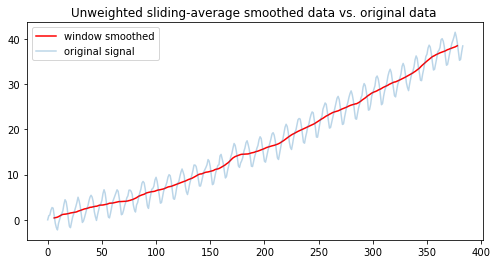

In [33]:

x_axis = normalized_col.index
y_axis = normalized_col['co2_val'].rolling(window=12, center=True).mean()

plt.figure(figsize=(18,4))

plt.subplot(1,2,1)
plt.plot(x_axis, y_axis, 'r', label="window smoothed")
plt.plot(x_axis,normalized_col['co2_val'], alpha=0.3, label="original signal")
plt.title("Unweighted sliding-average smoothed data vs. original data ")
plt.legend()


### Question:

* Above, we took a sliding window of size 12. What will happen if we change the size of the sliding window?
  
  * What happens if we take a larger sliding window?
  * What happens if we take a smaller sliding window?
    

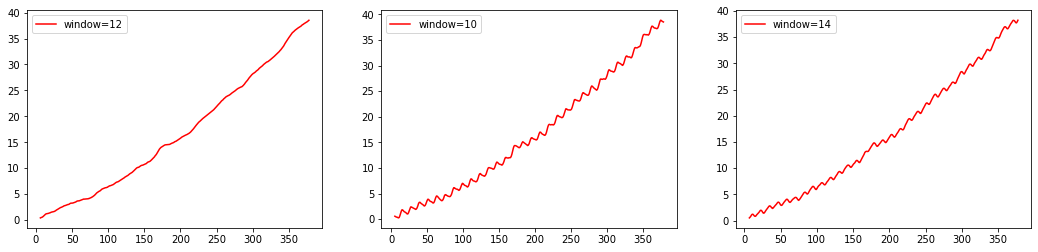

In [34]:

y_axis_10 = normalized_col['co2_val'].rolling(window=10, center=True).mean()
y_axis_14 = normalized_col['co2_val'].rolling(window=14, center=True).mean()

plt.figure(figsize=(18,4))

plt.subplot(1,3,1)
plt.plot(x_axis, y_axis, 'r', label="window=12")
plt.legend()
plt.subplot(1,3,2)
plt.plot(x_axis, y_axis_10, 'r', label="window=10")
plt.legend()
plt.subplot(1,3,3)
plt.plot(x_axis, y_axis_14, 'r', label="window=14")
plt.legend()


### Smoothing with a Sliding Window -- Cont'd


* The first and last 6 observations are missing since we don’t have sufficient data at these edges to average them

* We can now model the trend that we observed in the smoother signal.
* We thought a power law could be a good approximation for the data
  * Typically, you may (most likley will) have to try different functions to see which one fits the best
    * Which model is most accurate for representing your data
    * Can you think of a way to estimate which function provides the best fit?
    
* E.g., can we use an exponential function instead?
$$
f(x) = c_0 + c \cdot m^x
$$

(0.0, 400.0)

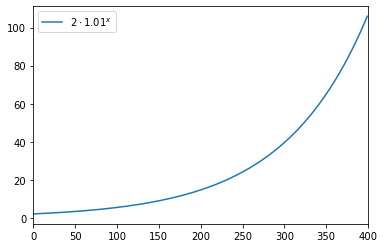

In [35]:
def func_exponential(x, a, c, c0):
    return c0 + c* (a**x)

x = np.arange(0,400,1)

y_1 = func_exponential(x, 1.01, 2, 0 )

plt.plot(x, y_1, label= "$2 \cdot {1.01}^x $")

plt.legend()
plt.xlim(0,400)

(0.0, 400.0)

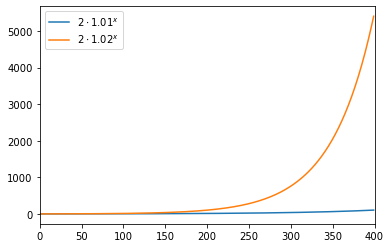

In [36]:
def func_exponential(x, a, c, c0):
    return c0 + c * (a**x)

x = np.arange(0,400,1)

y_1 = func_exponential(x, 1.01, 2, 0 )
y_2 = func_exponential(x, 1.02, 2, 0 )
#y_3 = func_exponential(x, 1.2, 2, 0 )


plt.plot(x, y_1, label= "$2 \cdot {1.01}^x $")
plt.plot(x, y_2, label= "$2 \cdot {1.02}^x $")
#plt.plot(x, y_3, label= "$-1 + 2 \cdot x^{1.8} $")

plt.legend()
plt.xlim(0,400)

### Selecting the Appropriate Model

* Here, even if the exponential has the correct shape, the parameters will be difficult to find `m`
  * Minor perturbations will lead to major changes in the curve
  * Minor perturbations will lead to poor fit

* Power law is more appropriate here

$$
    f(x) = c_0 + c \cdot x^m 
$$



### Modeling the Smoothed Window

* We could manually tweak the parameters $m$, $c$ and $c_0$ to produce the best fit between our smoothed data and the power law
  * The closer the function is to the data, the better the fit 
  
  



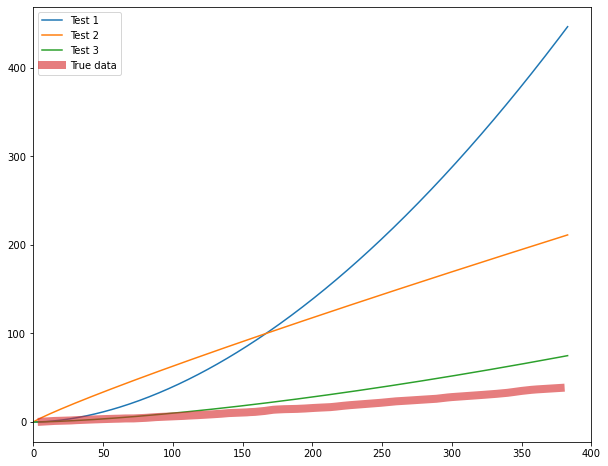

In [37]:
plt.figure(figsize=(10, 8))
plt.plot(x_axis, func_powerlaw(x_axis,  1.8, 0.01, 0), label='Test 1')
plt.plot(x_axis, func_powerlaw(x_axis, 0.9, 1, 0), label='Test 2')
plt.plot(x_axis, func_powerlaw(x_axis, 1.5, 0.01, 0), label='Test 3')
plt.plot(x_axis, y_axis,  linewidth=8, alpha=0.6, label="True data")
plt.xlim(0, 400)
plt.legend()


### Modeling the Smoothed Window -- Cont'd


* We can use the `curve_fit` function in `scipy` to identify the best values for the parameters (`c_0`, `c` and `m`).
  * https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
* `curve_fit()`
  * takes the data and the parameters we would like to optimize
  * returns:
      * `popt`: optimal params found by the curve fit
      * `pcov`: The estimated covariance of `popt` which tells us how good is the fit against our data
  * We will ignore `pcov` and visually validate the fit instead.
  
* Note: numerical approximation algorithms tend to work better if the values to be estimated are not very small or very large
  * Very small changes to the params lead to poor fit
  


In [38]:
popt, pcov = curve_fit(func_powerlaw, x_axis[6:-6], y_axis[6:-6], maxfev=2000)

In [39]:
popt

array([1.45242687, 0.00682777, 0.9794244 ])

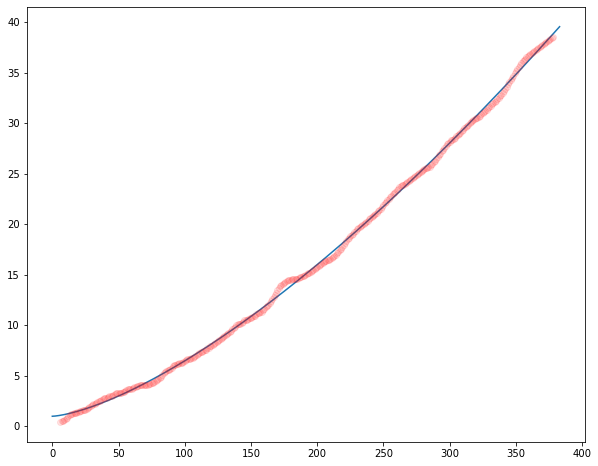

In [40]:
plt.figure(figsize=(10, 8))
plt.plot(x_axis, func_powerlaw(x_axis, *popt), '-')
plt.plot(x_axis, y_axis, 'ro', alpha=0.1)


### Subtracting the Trend

- We need to model the seasonal effect in the data

* To do so, it's common to remove the trend in the data
  * Similar to how we subtracted the seasonality using the smoothing when we were modeling the trend
  * Allows us to focus on the seasonality while abstracting out the trend 

* Since we know the equation for the trend, we can use it to remove the trend at each time point


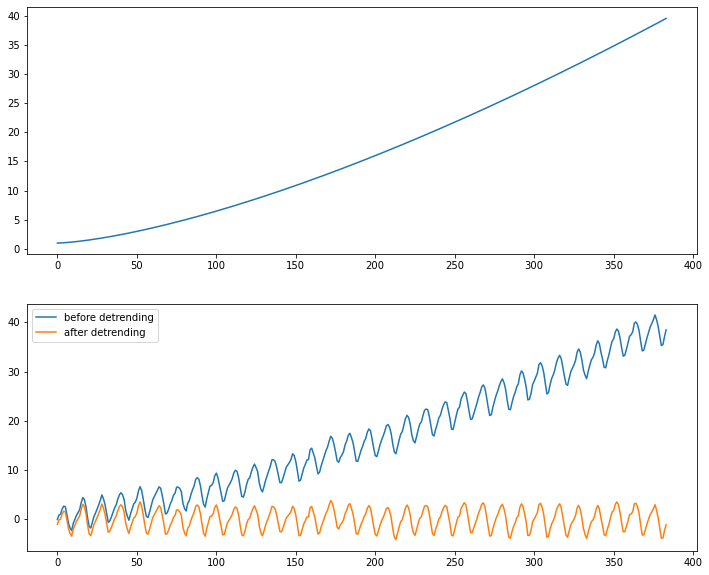

In [41]:

f, ax = plt.subplots(2, figsize=(12,10))


ax[0].plot(x_axis, func_powerlaw(x_axis, popt[0], popt[1], popt[2]), '-', )

plt.plot(x_axis, normalized_col['co2_val'], label="before detrending")

residuals = normalized_col['co2_val']- func_powerlaw(x_axis, popt[0], popt[1], popt[2])
plt.plot(x_axis, residuals, label="after detrending")
plt.legend()


### Subtracting the Seasonality

* After removing the trend, we are now left with periodicity reflective of the seasonality that is in the data.
  * We don't need to worry about the trend when modeling the seasonality

- The residuals' 'signal' is periodic and starts at the point 0
- Has a value of $0$ at $x=0$ 






### Modeling the Periodic Signal

- Therfore, we can try to model the periodicity with a sine curve

$$
y = a \cdot sin(b*x)
$$ 

* `b` determines the period
  * The natural period of the sine curve is $2\pi$

* `a` determines the amplitude

<img src="https://www.dropbox.com/s/ecamftnd8ikb5ip/sin_cos.png?dl=1" width="400px"/>

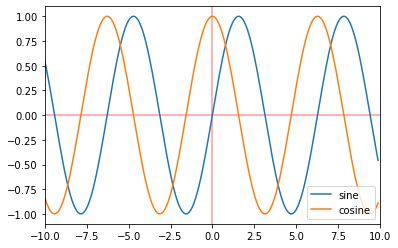

In [42]:
plt.axhline(y=0, linewidth=2, color='r', alpha=.3)
plt.axvline(x=0, linewidth=2, color='r', alpha=.3)
plt.xlim(-10,10)
plt.plot(np.arange(-10, 10, 0.1), np.sin(np.arange(-10, 10, 0.1)), label="sine")
plt.plot(np.arange(-10, 10, 0.1), np.cos(np.arange(-10, 10, 0.1)), label="cosine")
plt.legend()

### Subtracting the Seasonality - Cont'd 

- For the period, recall that the data is meteorological (cycle should repeat every 12 months?)
  - $2\pi$ = 12 months
  - We simply divide by 12 so that for $x = 12, 24, 36, \dots$, we have $sin(\frac{2  \pi x}{12}) = sin(\frac{2  \pi 12}{12}) = 0$


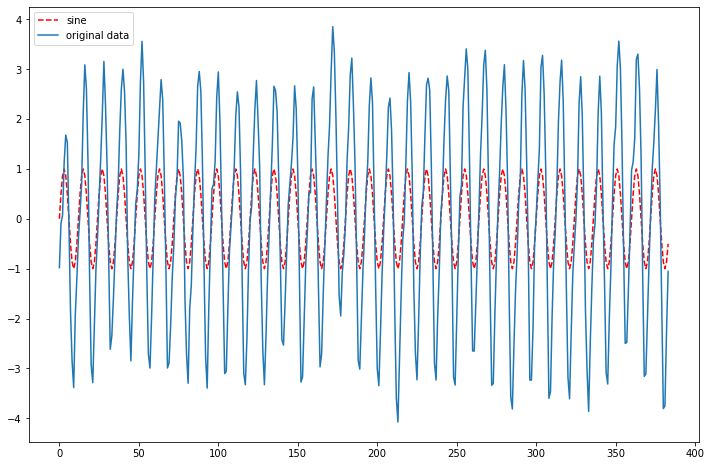

In [43]:
ax = plt.figure(figsize=(12,8))

plt.plot(x_axis, np.sin(2 * np.pi * x_axis / 12 ), 'r--', label='sine')
plt.plot(x_axis, residuals, label="original data")
plt.legend()


- For the amplitude, the data suggests a value of 3.    
  - We amplify (multiply) the signal by 3

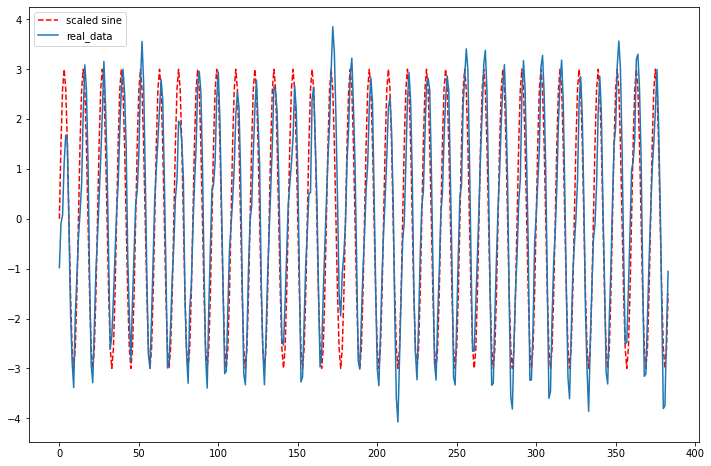

In [44]:
ax = plt.figure(figsize=(12,8))

plt.plot(x_axis, 3 * np.sin(2 * np.pi * x_axis / 12 ), 'r--', label='scaled sine')
plt.plot(x_axis, residuals, label="real_data")
plt.legend()


* As mentioned earlier, we can think of the time series $y_t$ as a combination of three components: 
    * A trend-cycle component
    * A seasonal component 
    * Remainder, which usually are stochastic fluctuations, or errors

* Here we will skip the error component and combine  the trend and the seasonality to approximate the data


In [45]:
def fx(x):
    trend = func_powerlaw(x, *popt) 
    seasonality = (3 * np.sin(2 * np.pi * x / 12))
    return trend +  seasonality

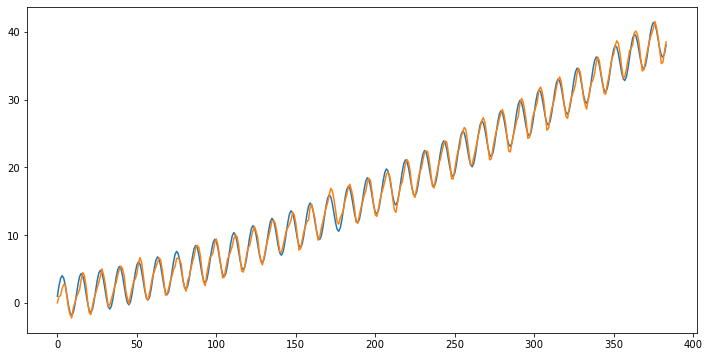

In [46]:
plt.figure(figsize=(12,6))
plt.plot(x_axis,  fx(x_axis))
plt.plot(normalized_col['co2_val'])


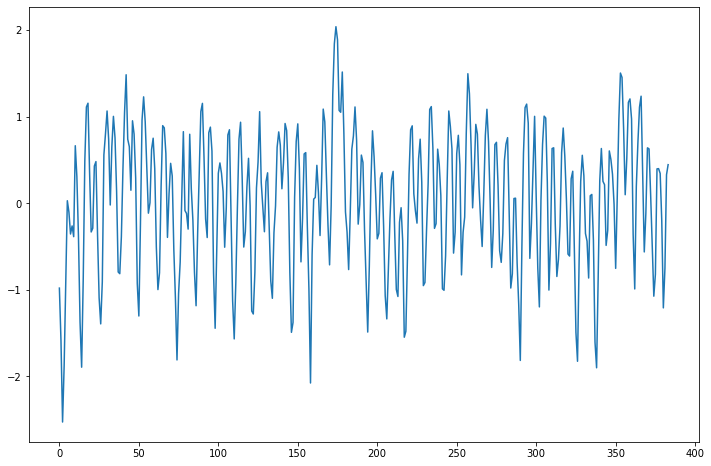

In [47]:
plt.figure(figsize=(12,8))

residuals = normalized_col['co2_val'] - fx(x_axis)

plt.plot(x_axis, residuals)

### Residual Seasonality 

* The residuals are rather small here avg ~ [-2, 2]

* This fit is still not perfect as there is still some residual seasonality
  - It's not as obvious as in the raw signal
  - We can zoom on the residuals between regions [60 - 120] to observe the remaining seasonality


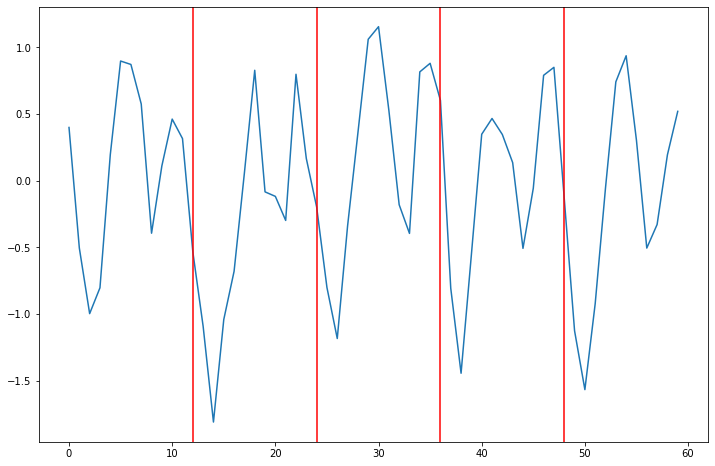

In [48]:
plt.figure(figsize=(12,8))

plt.plot(range(len(residuals[60: 120])), residuals[60: 120])

plt.axvline(x=12, color = 'r') 
plt.axvline(x=24, color = 'r') 
plt.axvline(x=36, color = 'r') 
plt.axvline(x=48, color = 'r') 


In [49]:
print(residuals.sum())
residuals.head()


10.995979520726065


0   -0.979424
1   -1.586252
2   -2.526186
3   -1.873096
4   -0.918637
dtype: float64

### Residual Seasonality - Contd

- We note that there is still as 12-months trend in the data
 - Large peaks are separated by 12 data points
 - [low, high, low, high, LOW], [low, high, low, high, LOW], ...

- This is since our sine wave does not fully capture all the seasonality in the data
  - We need to consider higher harmonics
    
- Harmonic is simply a wave $f_n$ such that:
$$
   f_n = n * f_1,
$$

where `n` is an integer multiple of the initial frequency (first harmonic) `f_1`


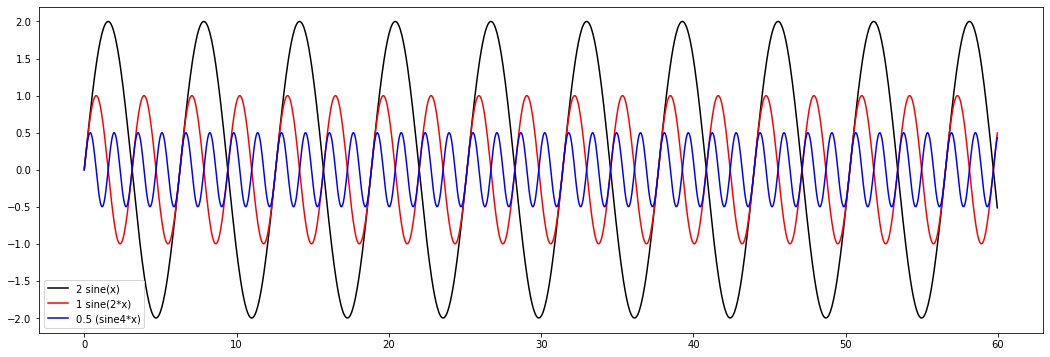

In [50]:
plt.figure(figsize=(18,6))

somePeriod = 1

x = np.arange(0, 60, 0.05)

freq = 2 * np.pi / 10

plt.plot(x , 2 * np.sin( x), 'k-', label='2 sine(x)')
plt.plot(x , 1 * np.sin(2 *  x ), 'r-', label='1 sine(2*x)')
plt.plot(x , 0.5 * np.sin(4  * x  ), 'b-', label='0.5 (sine4*x)')

plt.legend()

<img src="https://www.dropbox.com/s/pf4h72e9av55h0x/harmonics.png?dl=1" >
<center> Figure from Ranade and Xu; AN OVERVIEW OF HARMONICS MODELING AND SIMULATION
</center>

### Residual Seasonality - Contd

- Therefore, to obtain the second harmonic, we can divide the period by 2 ( period = 1/ freq).

```python
seasonality = (3 * np.sin(2 * np.pi * x / 12)) + 
              (0.75 * np.sin(2 * np.pi * x / 6)) 
```

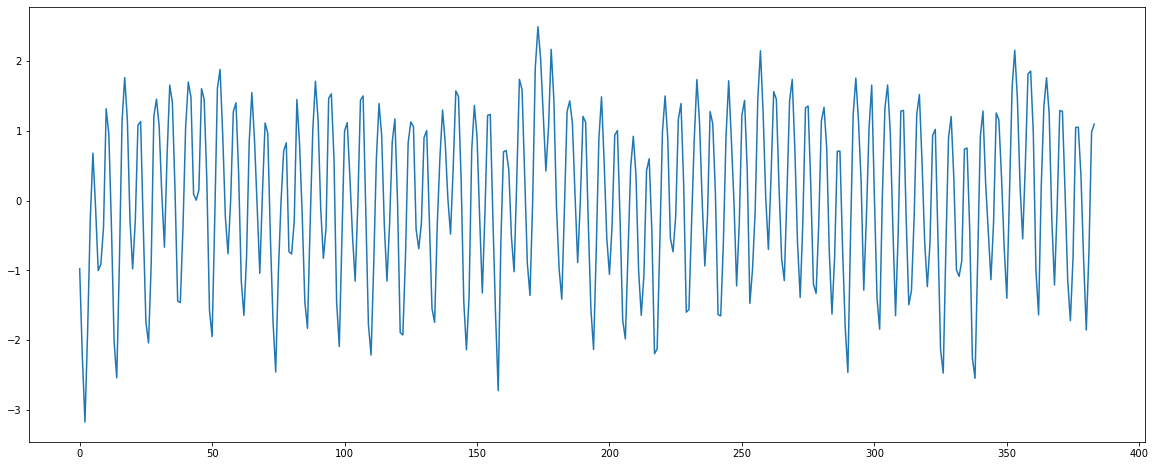

In [51]:
def fx(x):
    trend = func_powerlaw(x, *popt) 
    seasonality = (3 * np.sin(2 * np.pi * x / 12)) + (0.75 * np.sin(2 * np.pi * x / 6)) 
    return trend +  seasonality

ax = plt.figure(figsize=(20,8))

residuals = normalized_col['co2_val'] - fx(x_axis)
plt.plot(residuals)


In [52]:
residuals = pd.DataFrame(residuals)
print(residuals.sum())
residuals.head()

0    10.99598
dtype: float64


,0
0,-0.979424
1,-2.235771
2,-3.175705
3,-1.873096
4,-0.269118


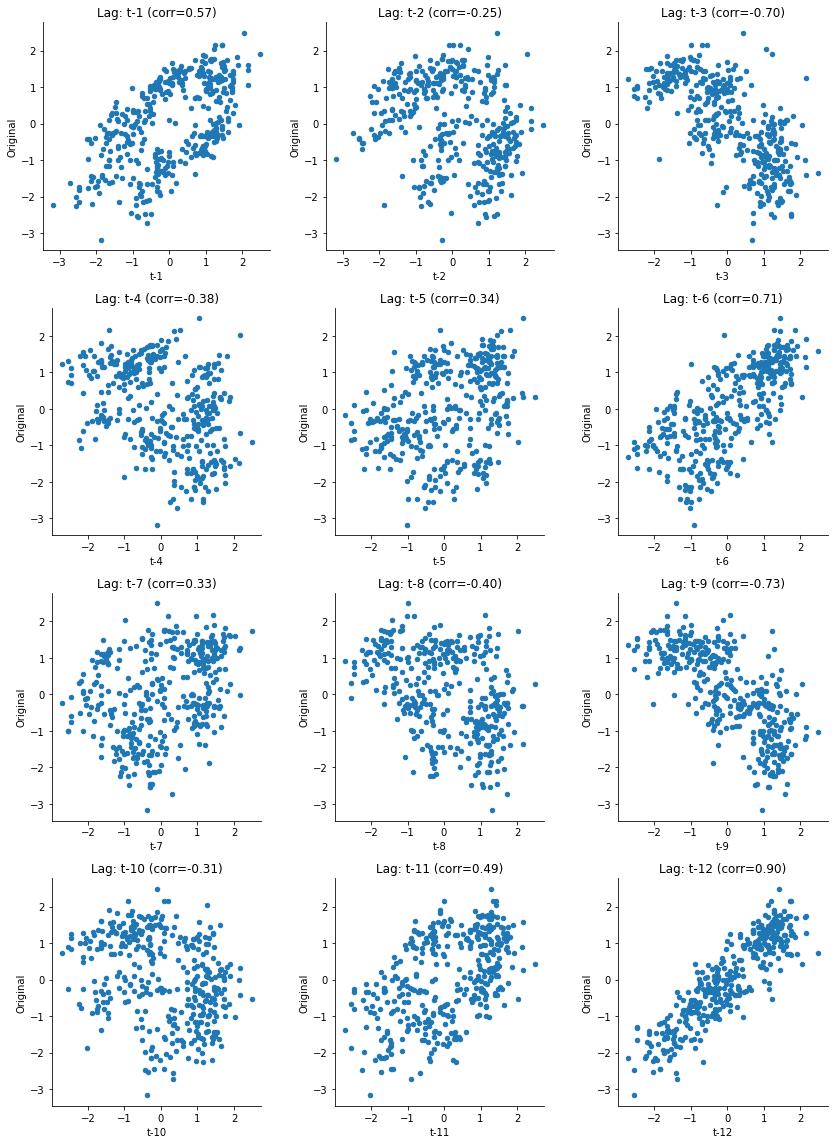

In [53]:
### Dicovering autocorrelation in the data
### How are the date correlated

lags=12
ncols=3
nrows=int(np.ceil(lags/ncols))

fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(4*ncols, 4*nrows))
residuals.columns = ['co2_val']
for ax, lag in zip(axes.flat, np.arange(1,lags+1, 1)):
    lag_str = 't-{}'.format(lag)
    X = (pd.concat([residuals['co2_val'], residuals['co2_val'].shift(-lag)], axis=1,
                   keys=['y'] + [lag_str]).dropna())

    X.plot(ax=ax, kind='scatter', y='y', x=lag_str);
    corr = X.corr().values[0][1]
    ax.set_ylabel('Original')
    ax.set_title('Lag: {} (corr={:.2f})'.format(lag_str, corr));
    ax.set_aspect('equal');
    sns.despine();

fig.tight_layout();

### Final Model
* Plotting the overall model
  * Power law trend
  * 12 month seasonality + one harminic (6 months)


* We can observe that our model fits the data rather well



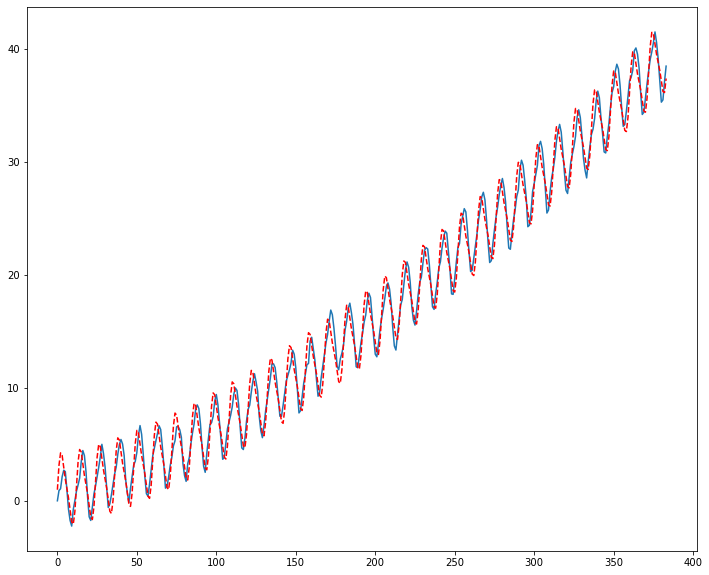

In [54]:
def fx(x):
    trend = func_powerlaw(x, *popt) 
    seasonality = (3 * np.sin(2 * np.pi * x / 12)) + (0.75 * np.sin(2 * np.pi * x / 6))
    return trend +  seasonality

ax = plt.figure(figsize=(12,10))

plt.plot(normalized_col['co2_val'])
plt.plot(fx(x_axis), linestyle='--', color='r') 


### Predicting Futre Data
* We predict a 3 years (36 months) of CO2 values


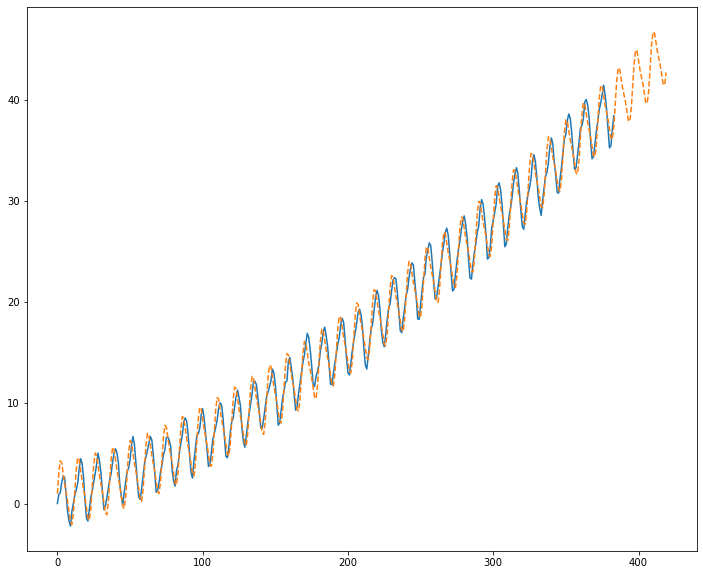

In [55]:
plt.figure(figsize=(12,10))

x_axis = np.arange(0, len(normalized_col['co2_val'])+36, 1)

plt.plot(normalized_col['co2_val'])

plt.plot(fx(x_axis), linestyle='--') 
